In [118]:
# Installing dependencies (on Colab for example)
# !apt install -y graphviz  # installingthe graphviz backend on a linux system
# !pip install graphviz  
# installing the python frontend for graphviz
# !pip install matplotlib
# !pip install seaborn
import pandas as pd
import numpy as np
from random import *
import numpy as np
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import accuracy_score



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
# Dataset adapted from https://archive.ics.uci.edu/ml/datasets/Zoo
url = 'https://raw.githubusercontent.com/MLCourse-LU/Datasets/main/zoo.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)


X = df.iloc[:, 1:-1]  # column 0 has the animal names, the last column has the labels
y = df.iloc[:, -1]  # use the last column as labels

fn = list(X.columns)  # get the column names of the features
cn = y.unique()  # get the different animal labels from the target column

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

DecisionTreeClassifier()

In [121]:
# Use the sklearn.tree.export_graphviz method to export the tree in "dot" format
dot = export_graphviz(
    decision_tree=model,  # the tree to visualize
    out_file=None,  # if None, return it as a string with "dot" information
    feature_names=fn,  # list of feature names
    class_names=sorted(cn),  # sorted! list of class names
    filled=True  # pretty colors
)

print(dot)  # "dot" is a string containing a structural description of our future graphic:

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="milk <= 0.5\ngini = 0.759\nsamples = 101\nvalue = [4, 20, 8, 13, 10, 41, 5]\nclass = Mammal", fillcolor="#ebccf8"] ;
1 [label="feathers <= 0.5\ngini = 0.785\nsamples = 60\nvalue = [4, 20, 8, 13, 10, 0, 5]\nclass = Bird", fillcolor="#f4fbe2"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="fins <= 0.5\ngini = 0.766\nsamples = 40\nvalue = [4, 0, 8, 13, 10, 0, 5]\nclass = Fish", fillcolor="#ebfcfc"] ;
1 -> 2 ;
3 [label="backbone <= 0.5\ngini = 0.719\nsamples = 27\nvalue = [4, 0, 8, 0, 10, 0, 5]\nclass = Invertebrate", fillcolor="#eaedfc"] ;
2 -> 3 ;
4 [label="airborne <= 0.5\ngini = 0.494\nsamples = 18\nvalue = [0, 0, 8, 0, 10, 0, 0]\nclass = Invertebrate", fillcolor="#d7ddfa"] ;
3 -> 4 ;
5 [label="predator <= 0.5\ngini = 0.278\nsamples = 12\nvalue = [0, 0, 2, 0, 10, 0, 0]\nclass = Invertebrate", fillcolor="#6178ea"] ;
4 -> 5 ;
6 [label="

In [123]:
# Load the dot information into a graphviz object
graph = graphviz.Source(dot)

# Print a copy to disk
graph.render('graphviz-tree', format='pdf', cleanup=True)  # save it as a file and clean up helper files

# Show the result if using a Notebook
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [191]:
from sklearn.model_selection import KFold
# Define models and configurations
std_scores_gini = []
mean_scores_gini =[]
std_scores_entropy = []
mean_scores_entropy =[]
kfolds = [i for i in range(2, 102,5)]
models = {
    'sklearn-Gini': DecisionTreeClassifier(criterion='gini'),
    'sklearn-Entropy': DecisionTreeClassifier(criterion='entropy')
}

# Define k-fold cross-validation
# k=2

# Evaluate models using cross-validation
results = {}
for k in range(2, 102,5):
    kf = KFold(n_splits=k,  shuffle=False, random_state=None)
    for model_name, model in models.items():
        scores = []
        for i, (train_index, test_index) in enumerate(kf.split(X)):
            # print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            # Train model and make predictions
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate accuracy score and store result
            accuracy = accuracy_score(y_test, y_pred)
            scores.append(accuracy)
        
        # Store mean and standard deviation of scores
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        results[model_name] = (mean_score, std_score, i)

    # Print results in a table
    print(f'Model, Mean Std dev')
    for model_name, (mean_score, std_score,i) in results.items():
        if model_name == 'sklearn-Gini':
            std_scores_gini.append(std_score)
            mean_scores_gini.append(mean_score)
        if model_name == 'sklearn-Entropy':
            std_scores_entropy.append(std_score)
            mean_scores_entropy.append(mean_score)
    
        
        

Model, Mean Std dev
sklear0.90.0999 1
sklear0.90030.0603 1
Model, Mean Std dev
sklear0.93940.0455 6
sklear0.93940.0455 6
Model, Mean Std dev
sklear0.92930.0937 11
sklear0.93860.0947 11
Model, Mean Std dev
sklear0.94110.1134 16
sklear0.95090.0950 16
Model, Mean Std dev
sklear0.92720.1311 21
sklear0.93630.1289 21
Model, Mean Std dev
sklear0.93820.1480 26
sklear0.93820.1480 26
Model, Mean Std dev
sklear0.93750.1545 31
sklear0.93750.1545 31
Model, Mean Std dev
sklear0.96390.1035 36
sklear0.95040.1277 36
Model, Mean Std dev
sklear0.94440.1528 41
sklear0.93250.1669 41
Model, Mean Std dev
sklear0.93610.1668 46
sklear0.93610.1668 46
Model, Mean Std dev
sklear0.93260.1968 51
sklear0.94230.1874 51
Model, Mean Std dev
sklear0.92980.2184 56
sklear0.94730.1797 56
Model, Mean Std dev
sklear0.96770.1228 61
sklear0.94350.1819 61
Model, Mean Std dev
sklear0.94020.2206 66
sklear0.94020.2206 66
Model, Mean Std dev
sklear0.94440.2133 71
sklear0.94440.2133 71
Model, Mean Std dev
sklear0.95450.2003 76
sklea

First mean gini: 0.9 and std gini: 0.09999999999999998
Last mean gini: 0.9484536082474226 and std gini: 0.22110938752089915
20
20
20


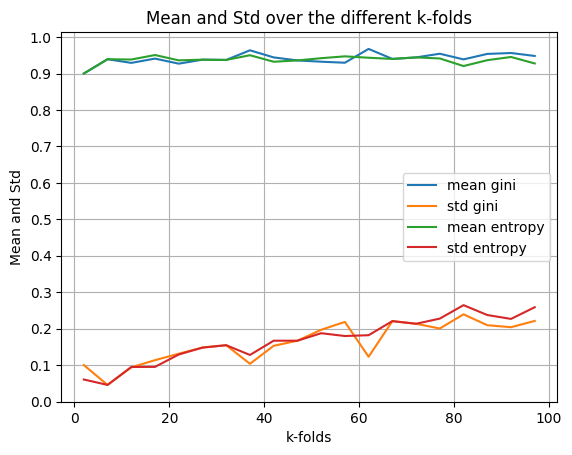

In [194]:

import matplotlib.pyplot as plt


print(f'First mean gini: {mean_scores_gini[0]} and std gini: {std_scores_gini[0]}')
print(f'Last mean gini: {mean_scores_gini[-1]} and std gini: {std_scores_gini[-1]}')
print(len(mean_scores_gini))
print(len(std_scores_gini))
print(len(kfolds))
# plot per model their mean and std over the different k-folds
plt.plot(kfolds, mean_scores_gini, label='mean gini')
plt.plot(kfolds, std_scores_gini, label='std gini')
plt.plot(kfolds, mean_scores_entropy, label='mean entropy')
plt.plot(kfolds, std_scores_entropy, label='std entropy')

plt.legend()
# title and labels
plt.title('Mean and Std over the different k-folds')
plt.xlabel('k-folds')
plt.ylabel('Mean and Std')
# on y as tick per .1
plt.yticks(np.arange(0, 1.1, 0.1))
# plot dotted line from first to last point
plt.grid(True)
# show plot
plt.show()

# print the first mean and std and the last mean and std



    

[[ 5  2  7  7]
 [11  8  3  5]
 [ 8  8 10  8]
 [ 4  9  2  3]]


[Text(0.5, 23.52222222222222, 'predicted'),
 Text(50.722222222222214, 0.5, 'true')]

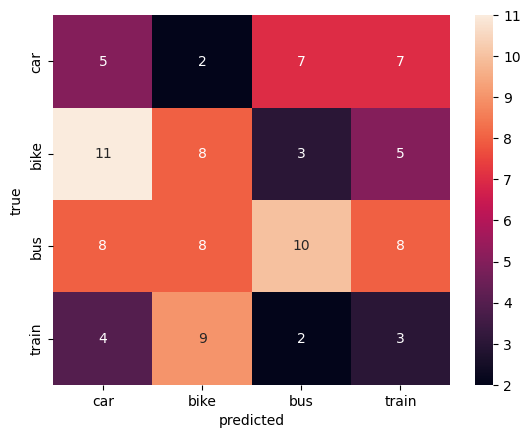

In [209]:

random = Random()
labels = ["car", "bike", "bus", "train"]	
y_pred = [labels[random.randint(0, 3)] for i in range(0, 100)]
y_true = [labels[random.randint(0, 3)] for i in range(0, 100)]

# for pred,true in zip(y_pred, y_true):
#     print(pred,true)

# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
print(cm)
# plot confusion matrix with seaborn

ax = sns.heatmap(df_cm, annot=True)
# set y as 'predicted' and x as 'true'
ax.set(xlabel='predicted', ylabel='true')




In [207]:
df_cm

,car,bike,bus,train
car,5,4,9,7
bike,4,6,5,13
bus,7,8,8,5
train,5,3,8,3
